In [1]:
from deepface import DeepFace
import cv2
import os
os.environ["CUDA_VISIBLE_DEVICES"]="0"
import matplotlib.pyplot as plt
from time import time
import numpy as np
from deepface.commons import functions
import pickle
#from deepface.commons import functions
#from retinaface import RetinaFace


In [2]:
help(DeepFace)

Help on module deepface.DeepFace in deepface:

NAME
    deepface.DeepFace

FUNCTIONS
    analyze(img_path, actions=['emotion', 'age', 'gender', 'race'], models={}, enforce_detection=True, detector_backend='mtcnn')
        This function analyzes facial attributes including age, gender, emotion and race
        
        Parameters:
                img_path: exact image path, numpy array or base64 encoded image could be passed. If you are going to analyze lots of images, then set this to list. e.g. img_path = ['img1.jpg', 'img2.jpg']
        
                actions (list): The default is ['age', 'gender', 'emotion', 'race']. You can drop some of those attributes.
        
                models: facial attribute analysis models are built in every call of analyze function. You can pass pre-built models to speed the function up.
        
                        models = {}
                        models['age'] = DeepFace.build_model('Age')
                        models['gender'] = DeepFac

In [3]:
img_path = '/media/rafael/Windows-SSD/recfac/bases/fairfaces/train/54361.jpg'
model_name = 'Facenet'
det_model = 'retinaface'
DeepFace.detectFace(img_path, detector_backend = det_model)
model = DeepFace.build_model(model_name)

[32, 16, 8] {'32': {'SCALES': (32, 16), 'BASE_SIZE': 16, 'RATIOS': (1.0,), 'ALLOWED_BORDER': 9999}, '16': {'SCALES': (8, 4), 'BASE_SIZE': 16, 'RATIOS': (1.0,), 'ALLOWED_BORDER': 9999}, '8': {'SCALES': (2, 1), 'BASE_SIZE': 16, 'RATIOS': (1.0,), 'ALLOWED_BORDER': 9999}}
use_landmarks True


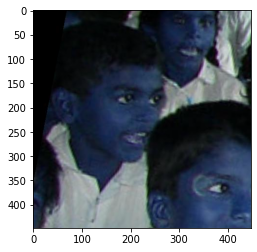

In [4]:
img = cv2.imread(img_path)
plt.imshow(img)

In [5]:
face = DeepFace.detectFace(img_path, detector_backend = det_model)
face.shape

[32, 16, 8] {'32': {'SCALES': (32, 16), 'BASE_SIZE': 16, 'RATIOS': (1.0,), 'ALLOWED_BORDER': 9999}, '16': {'SCALES': (8, 4), 'BASE_SIZE': 16, 'RATIOS': (1.0,), 'ALLOWED_BORDER': 9999}, '8': {'SCALES': (2, 1), 'BASE_SIZE': 16, 'RATIOS': (1.0,), 'ALLOWED_BORDER': 9999}}
use_landmarks True


(224, 224, 3)

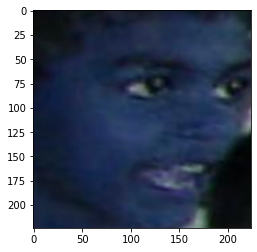

In [6]:
plt.imshow(face)

In [7]:
img_path = '/media/rafael/Windows-SSD/recfac/bases/fairfaces/train/10006.jpg'
img = cv2.imread(img_path)
face2, bbox = functions.detect_face(img, detector_backend=det_model)

In [8]:
bbox

[154, 106, 150, 199]

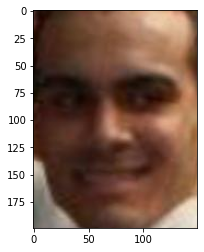

In [9]:
plt.imshow(face2)

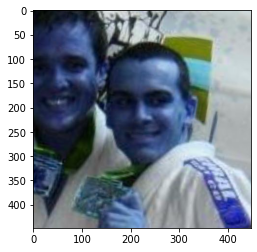

In [10]:
plt.imshow(img)

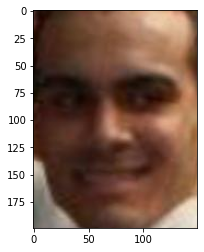

In [11]:
plt.imshow(face2)

In [12]:
features = DeepFace.represent(img_path=img_path, model_name = model_name, model = model, detector_backend = det_model)
len(features)

128

In [13]:
# folders = {'utk':'/media/rafael/Windows-SSD/recfac/bases/UTKFace/','fairface_train':'/media/rafael/Windows-SSD/recfac/bases/fairfaces/train/',
#            'fairfaces_val':'/media/rafael/Windows-SSD/recfac/bases/fairfaces/val/'}
#folders = {'rfw_asian':'/media/rafael/Windows-SSD/recfac/bases/rfw/asian/','rfw_african':'/media/rafael/Windows-SSD/recfac/bases/rfw/african/',
#           'rfw_caucasian':'/media/rafael/Windows-SSD/recfac/bases/rfw/caucasian/', 'rfw_indian':'/media/rafael/Windows-SSD/recfac/bases/rfw/indian/'}
folders = {'celebA':'/media/rafael/Windows-SSD/recfac/bases/CelebA/'}


keys = folders.keys()
for key in keys:
    files = os.listdir(folders[key])
    files = [folders[key]+f for f in files]
    print("Processing {} files from {} dataset.".format(len(files),key))
    start = time()
    features = {}
    for i,f in enumerate(files):
        file=os.path.basename(f)
        try:
            rep = DeepFace.represent(img_path=f, model_name = model_name, model = model, detector_backend = det_model, enforce_detection = True)
            features[file] = ('ok',rep)
        except ValueError:
            rep = np.zeros(128)
            features[file] = ('no face',rep)
            #print('\n',file, "no face found")
        print(i,end='\r')
    print("Enrolling {} files from {} dataset took {:.1f} seconds.".format(len(files), key, time() - start))
    print('Saving features to gallery file.')
    gal_file = '/media/rafael/Windows-SSD/recfac/'+key+'_facenet.gal'
    with open(gal_file,"wb") as gallery:
        pickle.dump(features, gallery)
    

Processing 202599 files from celebA dataset.
Enrolling 202599 files from celebA dataset took 10263.9 seconds.
Saving features to gallery file.


In [17]:
start = time()
features = {}
for i,f in enumerate(files):
    file=os.path.basename(f)
    try:
        rep = DeepFace.represent(img_path=f, model_name = model_name, model = model, detector_backend = det_model, enforce_detection = True)
        features[file] = ('ok',rep)
    except ValueError:
        rep = np.zeros(4096)
        features[file] = ('no face',rep)
        print('\n',file, "no face found")
    print(i,end='\r')
print(time() - start)

701.229083776474


In [18]:
len(features)

13230

In [19]:
import pickle

In [20]:
with open('/media/rafael/Windows-SSD/recfac/lfw_facenet.gal',"wb") as gallery:
    pickle.dump(features, gallery)

In [21]:
with open('/media/rafael/Windows-SSD/recfac/lfw_facenet.gal',"rb") as f:
        features = pickle.load(f, encoding="latin1")
fte = {key:val[0] for key,val in features.items() if val[0] != "ok"}
ok = {key:val[0] for key,val in features.items() if val[0] == "ok"}
len(fte), len(ok)

(0, 13230)

In [ ]:
del(features)